# Osnovna analiza podataka


In [1]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn import preprocessing

from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('data/csv_result-5year.csv')

In [3]:
data.shape
#data.info()

(5910, 66)

In [4]:
N = data.shape[0]
print('Broj instanci  u skupu podataka', N)

Broj instanci  u skupu podataka 5910


In [5]:
data.head()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.088238,0.55472,0.01134,1.0205,-66.52,0.34204,0.10949,0.57752,1.0881,...,0.080955,0.27543,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0
1,2,-0.006202,0.48465,0.23298,1.5998,6.1825,0,-0.006202,1.0634,1.2757,...,-0.028591,-0.012035,1.00470,0.15222,6.0911,3.2749,111.140,3.2841,3.37,0
2,3,0.13024,0.22142,0.57751,3.6082,120.04,0.18764,0.16212,3.059,1.1415,...,0.123960,0.19229,0.87604,0,8.7934,2.987,71.531,5.1027,5.6188,0
3,4,-0.089951,0.887,0.26927,1.5222,-55.992,-0.073957,-0.089951,0.1274,1.2754,...,0.418840,-0.79602,0.59074,2.8787,7.6524,3.3302,147.560,2.4735,5.9299,0
4,5,0.048179,0.55041,0.10765,1.2437,-22.959,0,0.05928,0.81682,1.515,...,0.240400,0.10716,0.77048,0.13938,10.118,4.095,106.430,3.4294,3.3622,0


In [6]:
X = data.drop(columns=['class', 'id'], axis = 1)
y = data['class']

In [7]:
attr = X.columns[0:len(X.columns)]
print('Broj atributa:', len(attr))

Broj atributa: 64


In [8]:
print(X.shape)
print(y.shape)

(5910, 64)
(5910,)


## Nedostajuce vrednosti

Primeceno je da u podacima postoje nedostajuce vrednosti koje su oznacene upitnikom (?)

In [9]:
print('Broj redova u kojima se pojavljuju nedostajuce vrednosti: ', (X == '?').any(axis=1).sum())

Broj redova u kojima se pojavljuju nedostajuce vrednosti:  2879


In [10]:
print('Ukupan broj pojavljivanja nedostajucih vrednosti u svim podacima: ', (X == '?').sum().sum())

Ukupan broj pojavljivanja nedostajucih vrednosti u svim podacima:  4666


In [11]:
attr_sum = (X == '?').sum().sort_values(ascending=False)
T = attr_sum.where(attr_sum > 0).dropna().astype(int)

In [12]:
print('Broj atributa u kojima se pojavljuju nedostajuce vrednosti: ', T.count())

Broj atributa u kojima se pojavljuju nedostajuce vrednosti:  49


In [13]:
print('Atributi sortirani po broju nedostajucih vrednosti (prvih 10): ')
T.head(10)

Atributi sortirani po broju nedostajucih vrednosti (prvih 10): 


Attr37    2548
Attr27     391
Attr45     268
Attr60     268
Attr24     135
Attr28     107
Attr64     107
Attr53     107
Attr54     107
Attr21     103
dtype: int64

In [14]:
X_new = X.replace('?', np.NaN)

<br>
Izbacicemo atribut koji ima najvise nedostajucih vrednosti (Attr37)

In [15]:
X_new = X_new.drop(columns=['Attr37'])

In [16]:
attr = attr[0:36].append(attr[37:])

In [17]:
attr.shape

(63,)

In [18]:
print('Ukupan broj pojavljivanja preostalih nedostajucih vrednosti (nakon izbacivanja attr 37): ', (X_new.isnull()).sum().sum())

Ukupan broj pojavljivanja preostalih nedostajucih vrednosti (nakon izbacivanja attr 37):  2118


In [19]:
rows_with_nan = [index for index, row in X_new.iterrows() if row.isnull().any()]
print('Preostali broj redova u kojima se pojavljuju nedostajuce vrednosti: ', len(rows_with_nan))

Preostali broj redova u kojima se pojavljuju nedostajuce vrednosti:  912


In [20]:
X_float = X_new.astype(float)

<br>
Primeceno je da su podaci neizbalansirani:

In [21]:
class_distribution = data['class'].value_counts()
class_distribution

0    5500
1     410
Name: class, dtype: int64

In [22]:
class_distribution.index

Int64Index([0, 1], dtype='int64')

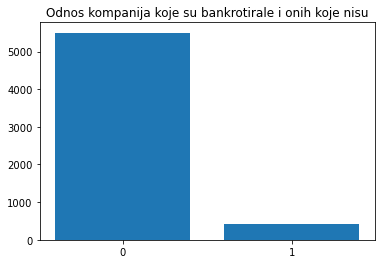

In [23]:
plt.title('Odnos kompanija koje su bankrotirale i onih koje nisu')
plt.bar(class_distribution.index, class_distribution.values)
plt.xticks(class_distribution.index)
plt.show()

In [24]:
#X.info()

## Korelisanost podataka

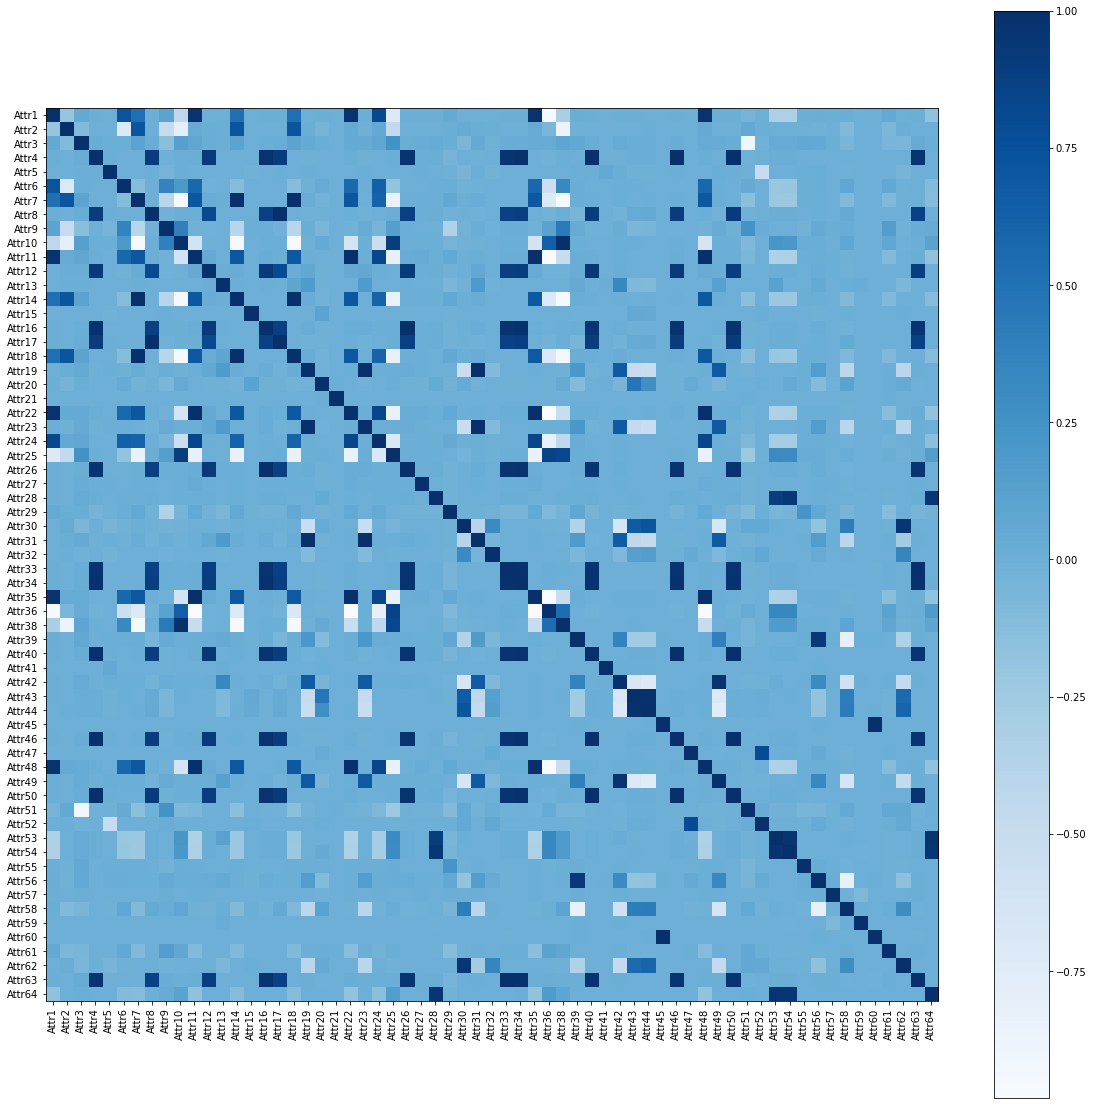

In [25]:
cor = X_float.corr()
plt.figure(figsize=(20,20))
plt.xticks(range(0, len(attr)), attr, rotation='vertical')
plt.yticks(range(0, len(attr)), attr)
plt.imshow(cor, cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

In [26]:
len(cor)

63

In [27]:
#cor

In [28]:
cor_abs = X.corr().abs()

In [29]:
#gornje trougaona matrica
upper_tri = cor_abs.where(np.triu(np.ones(cor_abs.shape),k=1).astype(bool))
#print(upper_tri)

Izbacicemo visoko korelisane atribute

In [30]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop

['Attr23', 'Attr31', 'Attr44', 'Attr49', 'Attr62']

In [31]:
X_final = X_new.drop(columns=to_drop)
X_final.shape

(5910, 58)

In [32]:
y_final = y

In [33]:
%store X_final
%store y_final

Stored 'X_final' (DataFrame)
Stored 'y_final' (Series)
